# Job Posting Classification Based on Required Skills

Scraping job listings from the website to get the dataset to create the model.

In [659]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

def scrape_karkidi_jobs(keyword="data science", pages=1):
    headers = {'User-Agent': 'Mozilla/5.0'}
    base_url = "https://www.karkidi.com/Find-Jobs/{page}/all/India?search={query}"
    jobs_list = []

    for page in range(1, pages + 1):
        url = base_url.format(page=page, query=keyword.replace(' ', '%20'))
        print(f"Scraping page: {page}")
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.content, "html.parser")

        job_blocks = soup.find_all("div", class_="ads-details")
        for job in job_blocks:
            try:
                title = job.find("h4").get_text(strip=True)
                company = job.find("a", href=lambda x: x and "Employer-Profile" in x).get_text(strip=True)
                location = job.find("p").get_text(strip=True)
                experience = job.find("p", class_="emp-exp").get_text(strip=True)
                key_skills_tag = job.find("span", string="Key Skills")
                skills = key_skills_tag.find_next("p").get_text(strip=True) if key_skills_tag else ""
                summary_tag = job.find("span", string="Summary")
                summary = summary_tag.find_next("p").get_text(strip=True) if summary_tag else ""

                jobs_list.append({
                    "Title": title,
                    "Company": company,
                    "Location": location,
                    "Experience": experience,
                    "Summary": summary,
                    "Skills": skills
                })
            except Exception as e:
                print(f"Error parsing job block: {e}")
                continue

        time.sleep(1)  # Be nice to the server

    return pd.DataFrame(jobs_list)

# Example use:
if __name__ == "__main__":
    df_jobs = scrape_karkidi_jobs(keyword="data science", pages=20)
    print(df_jobs.head())

In [624]:
df_jobs['Title'].value_counts()

Principal Product Manager - Growth, Poe (Remote)                 20
Machine Learning Physical Design Engineer                        20
Staff Software Engineer - Monetization, Poe (Remote)             20
Staff Backend Engineer - Bot Creator Ecosystem, Poe (Remote)     20
Senior Backend Engineer - Bot Creator Ecosystem, Poe (Remote)    20
Data Scientist Lead - AIML                                       20
Applied AI ML Director - Machine Learning                        20
Senior Product Designer                                          20
Manager - Machine Learning                                       20
Data Scientist                                                   20
Name: Title, dtype: int64

In [626]:
df['Skills'].value_counts()

Aartificial intelligence,API,Data science techniques,Design,Effective communication skills,Large Language Models - LLMs,Python Programming,Teamwork                                                                      20
Aartificial intelligence,Data Analytics,Data science techniques,Effective communication skills,Generative AI,GPT,NumPy,Pandas,Product Management,Python Programming,SQL                                                  10
Aartificial intelligence,Algorithms,Data structuring,Design,Machine learning techniques                                                                                                                                  10
Aartificial intelligence,Analytical and Problem solving,API,Data Analysis,Database,Design,Effective communication skills,GraphQL,Large Language Models - LLMs,Next.JS,Python Programming,React.js,Teamwork,TypeScript    10
Aartificial intelligence,Data science techniques,Large Language Models - LLMs,Machine learning techniques,Natural Langua

In [628]:
df_jobs.shape

(200, 6)

In [630]:
df_jobs.head(10)

,Title,Company,Location,Experience,Summary,Skills
0,"Principal Product Manager - Growth, Poe (Remote)","Quora, Inc.",India,6-8 year,About Quora:Quora’s mission is to grow and sha...,"Aartificial intelligence,Data Analytics,Data s..."
1,Machine Learning Physical Design Engineer,Google,"Bengaluru, Karnataka, India",4-6 year,Minimum qualifications:Bachelor's degree in El...,"Aartificial intelligence,Algorithms,Data struc..."
2,"Staff Software Engineer - Monetization, Poe (R...","Quora, Inc.",India,8-10 year,About Quora:Quora’s mission is to grow and sha...,"Aartificial intelligence,Analytical and Proble..."
3,Staff Backend Engineer - Bot Creator Ecosystem...,"Quora, Inc.",India,8-10 year,About Quora:Quora’s mission is to grow and sha...,"Aartificial intelligence,API,Data science tech..."
4,Senior Backend Engineer - Bot Creator Ecosyste...,"Quora, Inc.",India,6-8 year,About Quora:Quora’s mission is to grow and sha...,"Aartificial intelligence,API,Data science tech..."
5,Data Scientist Lead - AIML,JPMorgan Chase,"Bengaluru, Karnataka, India",6-8 year,We have an opportunity to impact your career a...,"Aartificial intelligence,Data science techniqu..."
6,Applied AI ML Director - Machine Learning,JPMorgan Chase,"Hyderabad, Telangana, India",12-14 year,Elevate your career as the Director of Machine...,"Aartificial intelligence,AWS,Azure,Google Clou..."
7,Senior Product Designer,Observe.AI,"Bangalore, Karnataka, India",8-10 year,Observe.AI is transforming customer service wi...,"Design,Leadership Skill,Machine learning techn..."
8,Manager - Machine Learning,Observe.AI,"Bangalore, Karnataka, India",8-10 year,Observe.AI is transforming customer service wi...,"Aartificial intelligence,Large Language Models..."
9,Data Scientist,Spotify,"Mumbai, Maharashtra, India",6-8 year,We are looking for a Data Scientist to join th...,"Amazon RedShift,Apache Hadoop,Data science tec..."


# Exporting the whole scraped data in csv format!

In [665]:
df_jobs.to_csv('scrap_jobs.csv', index=False)

# Importing the Scrap data!

In [668]:
df = pd.read_csv('scrap_jobs.csv')
df

,Title,Company,Location,Experience,Summary,Skills
0,"Principal Product Manager - Growth, Poe (Remote)","Quora, Inc.",India,6-8 year,About Quora:Quora’s mission is to grow and sha...,"Aartificial intelligence,Data Analytics,Data s..."
1,Machine Learning Physical Design Engineer,Google,"Bengaluru, Karnataka, India",4-6 year,Minimum qualifications:Bachelor's degree in El...,"Aartificial intelligence,Algorithms,Data struc..."
2,"Staff Software Engineer - Monetization, Poe (R...","Quora, Inc.",India,8-10 year,About Quora:Quora’s mission is to grow and sha...,"Aartificial intelligence,Analytical and Proble..."
3,Staff Backend Engineer - Bot Creator Ecosystem...,"Quora, Inc.",India,8-10 year,About Quora:Quora’s mission is to grow and sha...,"Aartificial intelligence,API,Data science tech..."
4,Senior Backend Engineer - Bot Creator Ecosyste...,"Quora, Inc.",India,6-8 year,About Quora:Quora’s mission is to grow and sha...,"Aartificial intelligence,API,Data science tech..."
...,...,...,...,...,...,...
195,Data Scientist Lead - AIML,JPMorgan Chase,"Bengaluru, Karnataka, India",6-8 year,We have an opportunity to impact your career a...,"Aartificial intelligence,Data science techniqu..."
196,Applied AI ML Director - Machine Learning,JPMorgan Chase,"Hyderabad, Telangana, India",12-14 year,Elevate your career as the Director of Machine...,"Aartificial intelligence,AWS,Azure,Google Clou..."
197,Senior Product Designer,Observe.AI,"Bangalore, Karnataka, India",8-10 year,Observe.AI is transforming customer service wi...,"Design,Leadership Skill,Machine learning techn..."
198,Manager - Machine Learning,Observe.AI,"Bangalore, Karnataka, India",8-10 year,Observe.AI is transforming customer service wi...,"Aartificial intelligence,Large Language Models..."


In [670]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       200 non-null    object
 1   Company     200 non-null    object
 2   Location    200 non-null    object
 3   Experience  200 non-null    object
 4   Summary     200 non-null    object
 5   Skills      200 non-null    object
dtypes: object(6)
memory usage: 9.5+ KB


In [672]:
df['Skills'].value_counts()

Aartificial intelligence,API,Data science techniques,Design,Effective communication skills,Large Language Models - LLMs,Python Programming,Teamwork                                                                      40
Aartificial intelligence,Data Analytics,Data science techniques,Effective communication skills,Generative AI,GPT,NumPy,Pandas,Product Management,Python Programming,SQL                                                  20
Aartificial intelligence,Algorithms,Data structuring,Design,Machine learning techniques                                                                                                                                  20
Aartificial intelligence,Analytical and Problem solving,API,Data Analysis,Database,Design,Effective communication skills,GraphQL,Large Language Models - LLMs,Next.JS,Python Programming,React.js,Teamwork,TypeScript    20
Aartificial intelligence,Data science techniques,Large Language Models - LLMs,Machine learning techniques,Natural Langua

In [674]:
df['Title'].value_counts()

Principal Product Manager - Growth, Poe (Remote)                 20
Machine Learning Physical Design Engineer                        20
Staff Software Engineer - Monetization, Poe (Remote)             20
Staff Backend Engineer - Bot Creator Ecosystem, Poe (Remote)     20
Senior Backend Engineer - Bot Creator Ecosystem, Poe (Remote)    20
Data Scientist Lead - AIML                                       20
Applied AI ML Director - Machine Learning                        20
Senior Product Designer                                          20
Manager - Machine Learning                                       20
Data Scientist                                                   20
Name: Title, dtype: int64

In [676]:
df['Skills'][0].split(',')

['Aartificial intelligence',
 'Data Analytics',
 'Data science techniques',
 'Effective communication skills',
 'Generative AI',
 'GPT',
 'NumPy',
 'Pandas',
 'Product Management',
 'Python Programming',
 'SQL']

In [678]:
df['Skills_clean'] = df['Skills'].str.lower().str.replace(r'[^a-z,]', ' ', regex=True)

In [680]:
df['Filter_skills'] = df['Skills_clean'].str.replace(',',' ')

In [682]:
df.head()

,Title,Company,Location,Experience,Summary,Skills,Skills_clean,Filter_skills
0,"Principal Product Manager - Growth, Poe (Remote)","Quora, Inc.",India,6-8 year,About Quora:Quora’s mission is to grow and sha...,"Aartificial intelligence,Data Analytics,Data s...","aartificial intelligence,data analytics,data s...",aartificial intelligence data analytics data s...
1,Machine Learning Physical Design Engineer,Google,"Bengaluru, Karnataka, India",4-6 year,Minimum qualifications:Bachelor's degree in El...,"Aartificial intelligence,Algorithms,Data struc...","aartificial intelligence,algorithms,data struc...",aartificial intelligence algorithms data struc...
2,"Staff Software Engineer - Monetization, Poe (R...","Quora, Inc.",India,8-10 year,About Quora:Quora’s mission is to grow and sha...,"Aartificial intelligence,Analytical and Proble...","aartificial intelligence,analytical and proble...",aartificial intelligence analytical and proble...
3,Staff Backend Engineer - Bot Creator Ecosystem...,"Quora, Inc.",India,8-10 year,About Quora:Quora’s mission is to grow and sha...,"Aartificial intelligence,API,Data science tech...","aartificial intelligence,api,data science tech...",aartificial intelligence api data science tech...
4,Senior Backend Engineer - Bot Creator Ecosyste...,"Quora, Inc.",India,6-8 year,About Quora:Quora’s mission is to grow and sha...,"Aartificial intelligence,API,Data science tech...","aartificial intelligence,api,data science tech...",aartificial intelligence api data science tech...


# Text Vectorization!

In [685]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split(','),token_pattern=None, lowercase=True)
vectorizer

TfidfVectorizer(token_pattern=None,
                tokenizer=<function <lambda> at 0x0000011F65387160>)

In [687]:
skill_matrix = vectorizer.fit_transform(df['Skills_clean'])
skill_matrix.toarray()

array([[0.13603231, 0.        , 0.        , ..., 0.28831097, 0.        ,
        0.        ],
       [0.22915527, 0.61115219, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1243971 , 0.        , 0.        , ..., 0.        , 0.22320316,
        0.3317644 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33476949, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.41719424, ..., 0.3315415 , 0.        ,
        0.        ]])

In [689]:
print(vectorizer.get_feature_names_out())

['aartificial intelligence' 'algorithms' 'amazon redshift'
 'analytical and problem solving' 'apache hadoop' 'api' 'aws' 'azure'
 'data analysis' 'data analytics' 'data science techniques'
 'data structuring' 'database' 'design' 'effective communication skills'
 'generative ai' 'google bigquery' 'google cloud platform  gcp ' 'gpt'
 'graphql' 'kubernetes k s' 'large language models   llms'
 'leadership skill' 'machine learning techniques'
 'natural language processing  nlp ' 'next js' 'numpy' 'pandas'
 'product management' 'python programming' 'r programming' 'react js'
 'sql' 'teamwork' 'typescript']


In [691]:
skill_matrix[0].toarray().shape

(1, 35)

# ElbowCurve to select the appropriate no of clusters

In [933]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_predict(skill_matrix)
    wcss.append(kmeans.inertia_)
wcss

[145.6032679430782,
 115.89509503921613,
 94.6940048714075,
 67.99469025089581,
 57.29989426250365,
 42.59212837320858,
 17.64394694910257,
 3.002621242589576,
 2.220446049250313e-15]

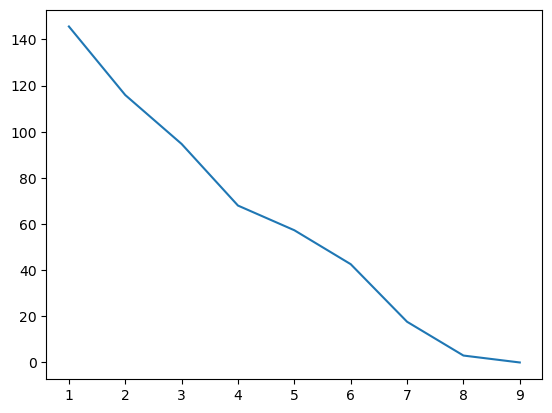

In [940]:
plt.plot(range(1,10),wcss)

# Silhouette_score

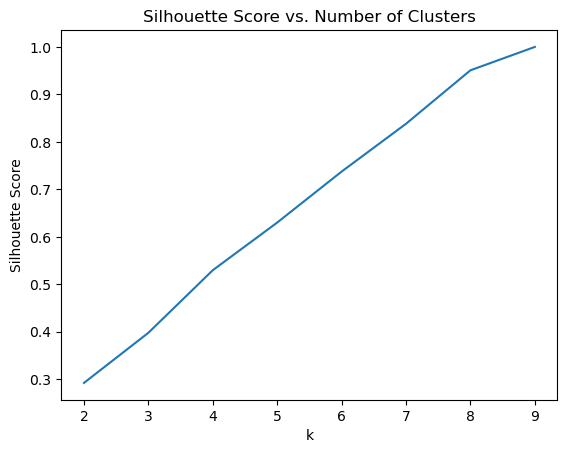

In [957]:
from sklearn.metrics import silhouette_score

scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(skill_matrix)
    scores.append(silhouette_score(skill_matrix, labels))

plt.plot(range(2, 10), scores)
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()

# Applying KMeans

In [938]:
from sklearn.cluster import KMeans

k = 8  
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(skill_matrix)

In [908]:
df['Cluster'].value_counts()

0    40
3    40
2    20
4    20
7    20
6    20
1    20
5    20
Name: Cluster, dtype: int64

In [949]:
import pickle
pickle.dump(kmeans, open('jobclassifier.pkl','wb'))   

# Vocabulary of the skillset

In [911]:
terms = vectorizer.get_feature_names_out()
terms

array(['aartificial intelligence', 'algorithms', 'amazon redshift',
       'analytical and problem solving', 'apache hadoop', 'api', 'aws',
       'azure', 'data analysis', 'data analytics',
       'data science techniques', 'data structuring', 'database',
       'design', 'effective communication skills', 'generative ai',
       'google bigquery', 'google cloud platform  gcp ', 'gpt', 'graphql',
       'kubernetes k s', 'large language models   llms',
       'leadership skill', 'machine learning techniques',
       'natural language processing  nlp ', 'next js', 'numpy', 'pandas',
       'product management', 'python programming', 'r programming',
       'react js', 'sql', 'teamwork', 'typescript'], dtype=object)

In [913]:
len(terms)

35

# Clusters

In [928]:
import numpy as np
import pandas as pd

# Inverse transform TF-IDF matrix to readable terms
terms = vectorizer.get_feature_names_out()

def top_keywords_per_cluster(tfidf_matrix, labels, n_terms=10):
    cluster_df = pd.DataFrame(tfidf_matrix.todense()).groupby(labels).mean()
    for i, row in cluster_df.iterrows():
        print(f"\nCluster {i} Top Skills:")
        print(', '.join([terms[t] for t in np.argsort(row)[-n_terms:][::-1]]))

top_keywords_per_cluster(skill_matrix, df['Cluster'])


Cluster 0 Top Skills:
api, teamwork, effective communication skills, design, data science techniques, large language models   llms, python programming, aartificial intelligence, aws, generative ai

Cluster 1 Top Skills:
leadership skill, design, machine learning techniques, typescript, generative ai, database, data structuring, data science techniques, data analytics, data analysis

Cluster 2 Top Skills:
data analytics, generative ai, product management, pandas, numpy, gpt, sql, effective communication skills, data science techniques, python programming

Cluster 3 Top Skills:
natural language processing  nlp , machine learning techniques, large language models   llms, aartificial intelligence, data science techniques, python programming, database, data structuring, data analytics, data analysis

Cluster 4 Top Skills:
algorithms, data structuring, design, machine learning techniques, aartificial intelligence, data analytics, effective communication skills, database, data science techni

# Job Clusters based on skills

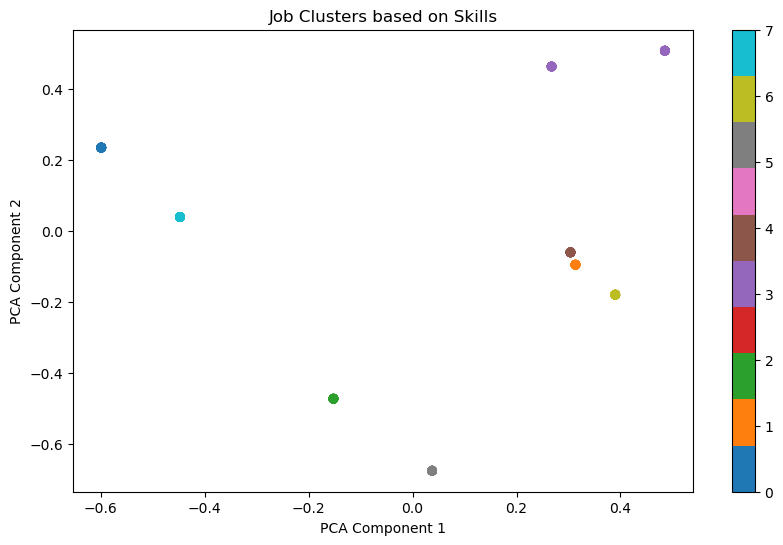

In [931]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
components = pca.fit_transform(skill_matrix.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(components[:, 0], components[:, 1], c=df['Cluster'], cmap='tab10')
plt.title('Job Clusters based on Skills')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

# Assigning Job Category based on skills

In [863]:
labels_dict = {0:"AI Product Manager / Tech Lead",1:"AI Developer / Applied ML Engineer",2:"Cloud ML Engineer / MLOps Engineer",3:"NLP/LLM Specialist / Research Engineer",4:"Big Data Engineer / Data Platform Engineer",5: "AI Product Analyst / GenAI Product Manager",6: "Machine Learning Engineer / Data Scientist",7:"Full Stack Developer (Data-Driven)"}

In [865]:
df['Job Category'] = df['Cluster'].map(labels_dict)

# Jobs Categorization

In [868]:
df['Job Category'].value_counts()

AI Product Manager / Tech Lead                40
NLP/LLM Specialist / Research Engineer        40
Cloud ML Engineer / MLOps Engineer            20
Big Data Engineer / Data Platform Engineer    20
Full Stack Developer (Data-Driven)            20
Machine Learning Engineer / Data Scientist    20
AI Developer / Applied ML Engineer            20
AI Product Analyst / GenAI Product Manager    20
Name: Job Category, dtype: int64

# Job category for the given skills

In [871]:
user_skills = ["next js"]

In [873]:
user_skills_text = ' '.join(user_skills)
user_vector = vectorizer.transform([user_skills_text])

In [875]:
user_cluster = kmeans.predict(user_vector)[0]
labels_dict[user_cluster]

'Full Stack Developer (Data-Driven)'

In [877]:
recommended_jobs = df[df['Cluster'] == user_cluster]

In [879]:
recommended_jobs.head()

,Title,Company,Location,Experience,Summary,Skills,Skills_clean,Filter_skills,Cluster,Job Category
2,"Staff Software Engineer - Monetization, Poe (R...","Quora, Inc.",India,8-10 year,About Quora:Quora’s mission is to grow and sha...,"Aartificial intelligence,Analytical and Proble...","aartificial intelligence,analytical and proble...",aartificial intelligence analytical and proble...,7,Full Stack Developer (Data-Driven)
12,"Staff Software Engineer - Monetization, Poe (R...","Quora, Inc.",India,8-10 year,About Quora:Quora’s mission is to grow and sha...,"Aartificial intelligence,Analytical and Proble...","aartificial intelligence,analytical and proble...",aartificial intelligence analytical and proble...,7,Full Stack Developer (Data-Driven)
22,"Staff Software Engineer - Monetization, Poe (R...","Quora, Inc.",India,8-10 year,About Quora:Quora’s mission is to grow and sha...,"Aartificial intelligence,Analytical and Proble...","aartificial intelligence,analytical and proble...",aartificial intelligence analytical and proble...,7,Full Stack Developer (Data-Driven)
32,"Staff Software Engineer - Monetization, Poe (R...","Quora, Inc.",India,8-10 year,About Quora:Quora’s mission is to grow and sha...,"Aartificial intelligence,Analytical and Proble...","aartificial intelligence,analytical and proble...",aartificial intelligence analytical and proble...,7,Full Stack Developer (Data-Driven)
42,"Staff Software Engineer - Monetization, Poe (R...","Quora, Inc.",India,8-10 year,About Quora:Quora’s mission is to grow and sha...,"Aartificial intelligence,Analytical and Proble...","aartificial intelligence,analytical and proble...",aartificial intelligence analytical and proble...,7,Full Stack Developer (Data-Driven)


In [881]:
print(recommended_jobs[['Title', 'Company', 'Location']])

                                                 Title      Company Location
2    Staff Software Engineer - Monetization, Poe (R...  Quora, Inc.    India
12   Staff Software Engineer - Monetization, Poe (R...  Quora, Inc.    India
22   Staff Software Engineer - Monetization, Poe (R...  Quora, Inc.    India
32   Staff Software Engineer - Monetization, Poe (R...  Quora, Inc.    India
42   Staff Software Engineer - Monetization, Poe (R...  Quora, Inc.    India
52   Staff Software Engineer - Monetization, Poe (R...  Quora, Inc.    India
62   Staff Software Engineer - Monetization, Poe (R...  Quora, Inc.    India
72   Staff Software Engineer - Monetization, Poe (R...  Quora, Inc.    India
82   Staff Software Engineer - Monetization, Poe (R...  Quora, Inc.    India
92   Staff Software Engineer - Monetization, Poe (R...  Quora, Inc.    India
102  Staff Software Engineer - Monetization, Poe (R...  Quora, Inc.    India
112  Staff Software Engineer - Monetization, Poe (R...  Quora, Inc.    India

# Job Recommendation!

In [885]:
user_skills = "machine learning, deep learning, python, pandas"

user_skills_cleaned = user_skills.replace(' ', '').lower()
user_vector = vectorizer.transform([user_skills_cleaned])

In [887]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_scores = cosine_similarity(user_vector, skill_matrix)

In [889]:
import numpy as np

# Get top 5 most similar jobs
top_n = 5
top_indices = np.argsort(similarity_scores[0])[::-1][:top_n]

# Show top job recommendations
recommended_jobs = df.iloc[top_indices][['Title', 'Company', 'Location', 'Skills']]
recommended_jobs

,Title,Company,Location,Skills
0,"Principal Product Manager - Growth, Poe (Remote)","Quora, Inc.",India,"Aartificial intelligence,Data Analytics,Data s..."
80,"Principal Product Manager - Growth, Poe (Remote)","Quora, Inc.",India,"Aartificial intelligence,Data Analytics,Data s..."
140,"Principal Product Manager - Growth, Poe (Remote)","Quora, Inc.",India,"Aartificial intelligence,Data Analytics,Data s..."
150,"Principal Product Manager - Growth, Poe (Remote)","Quora, Inc.",India,"Aartificial intelligence,Data Analytics,Data s..."
60,"Principal Product Manager - Growth, Poe (Remote)","Quora, Inc.",India,"Aartificial intelligence,Data Analytics,Data s..."
